In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Import and normalize data.

In [2]:
data = pd.read_csv('ex1/ex1data2.txt', header=None, names=['size', 'beds', 'price'])

mins = []
maxs = []

for i in range(data.shape[1]):
    curMin = data.iloc[:, i].min()
    mins.append(curMin)
    data.iloc[:, i] -= curMin
    curMax = data.iloc[:, i].max()
    maxs.append(curMax)
    data.iloc[:, i] /= curMax

Insert x0 feature.

In [3]:
data.insert(0, 'x0', 1)

In [4]:
data.head()

,x0,size,beds,price
0,1,0.345284,0.50,0.433962
1,1,0.206288,0.50,0.301887
2,1,0.426917,0.50,0.375660
3,1,0.155543,0.25,0.117170
4,1,0.592388,0.75,0.698113


m = number of training examples

n = number of features excluding x0

In [5]:
m = data.shape[0]
n = data.shape[1] - 2

feature_vectors is a list of vectors, each of which contains all features including x0.

In [6]:
feature_vectors = [data.iloc[i, :n + 1].values for i in range(m)]

In [7]:
feature_vectors

[array([ 1.        ,  0.34528406,  0.5       ]),
 array([ 1.        ,  0.20628792,  0.5       ]),
 array([ 1.        ,  0.42691671,  0.5       ]),
 array([ 1.       ,  0.1555433,  0.25     ]),
 array([ 1.        ,  0.59238831,  0.75      ]),
 array([ 1.        ,  0.31246553,  0.75      ]),
 array([ 1.        ,  0.18808605,  0.5       ]),
 array([ 1.        ,  0.15857694,  0.5       ]),
 array([ 1.      ,  0.145615,  0.5     ]),
 array([ 1.        ,  0.17705461,  0.5       ]),
 array([ 1.        ,  0.30005516,  0.75      ]),
 array([ 1.        ,  0.31660232,  0.5       ]),
 array([ 1.        ,  0.28626586,  0.5       ]),
 array([ 1.,  1.,  1.]),
 array([ 1.        ,  0.11472697,  0.5       ]),
 array([ 1.        ,  0.39933811,  0.75      ]),
 array([ 1.        ,  0.12906784,  0.25      ]),
 array([ 1.        ,  0.10590182,  0.5       ]),
 array([ 1.        ,  0.48455598,  0.75      ]),
 array([ 1.        ,  0.60093767,  0.75      ]),
 array([ 1.        ,  0.25234418,  0.5       ]),
 arr

params is a vector containing the parameters.

In [8]:
params = np.zeros(n + 1)

evalHypothesisAt() evaluates the hypothesis at a certain index in the feature_vectors.

In [9]:
def evalHypothesisAt(i):
    return np.dot(params, feature_vectors[i])

output_vector contains all the output values.

In [10]:
output_vector = data.iloc[:, n + 1].values

evalCost() evaluates the cost function.

In [11]:
def evalCost():
    csum = 0
    for i in range(m):
        csum += (evalHypothesisAt(i) - output_vector[i])**2
    return csum/(2*m)

In [12]:
def gradDesc(alpha):
    global params
    sumX = np.zeros(n+1)
    for i in range(m):
        sumX += (evalHypothesisAt(i) - output_vector[i])*np.asarray(feature_vectors[i])
    params = params - (alpha/m)*sumX

Store the cost function and iterations to plot them later, and apply gradient descent.

In [13]:
cost = []
iters = []
for i in range(1000):
    cost.append(evalCost())
    iters.append(i)
    gradDesc(0.5)

Evaluate the hypothesis at all points in the training set, and plot the line.

In [14]:
ar = []
for k in range(m):
    ar.append(evalHypothesisAt(k))
    
print(params)
print(evalCost())

[ 0.05575054  0.95233281 -0.06583455]
0.00727404805174


Additional: plot cost function against iterations.

<IPython.core.display.Javascript object>


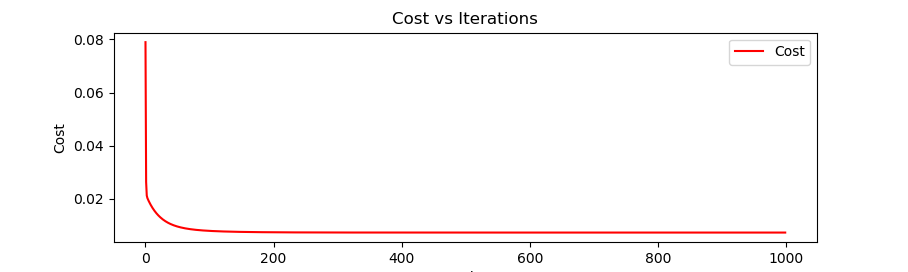

In [15]:
plt.plot(iters, cost, color='r', label='Cost')
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Cost vs Iterations')
plt.legend()
plt.show()

Additional: plot cost function (normalized) for various parameter values as a surface plot.

Revert data and prediction to original (non-normalized state).

In [16]:
data = pd.read_csv('ex1/ex1data2.txt', header=None, names=['size', 'beds', 'price'])

tsum = 0
for i in range(n):
    tsum += ((params.flat[i + 1] * mins[i])/maxs[i])

params.flat[0] = (maxs[n] * (params.flat[0] - tsum)) + mins[n]

for i in range(1, n + 1):
    params.flat[i] = (params.flat[i] * maxs[n])/maxs[i - 1]
    
print(params)

[ 89573.12331576    139.19922516  -8723.07802236]


In [17]:
def x(x1, x2):
    v = params.flat[0] + params.flat[1]*x1 + params.flat[2]*x2
    print(v)

In [18]:
x(2609, 4)

417851.589679


<IPython.core.display.Javascript object>


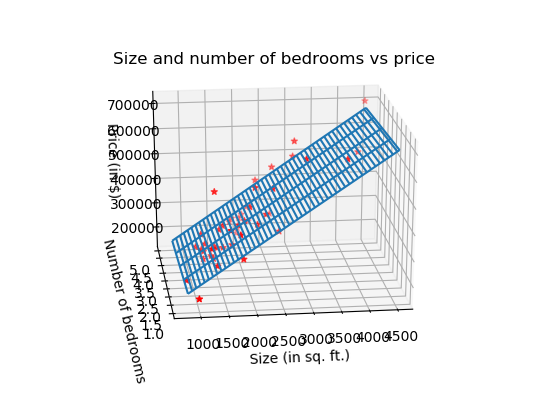

In [22]:
X, Y = np.meshgrid(np.linspace(800, 4500, 100), np.linspace(1, 5, 5))
z = []
for i in range(len(X)):
    l = []
    for j in range(len(X[i])):
        l.append(params.flat[0] + params.flat[1]*X[i][j] + params.flat[2]*Y[i][j])
    z.append(l)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], marker = '*', c='r')
p = ax.plot_wireframe(X, Y, z)
ax.set_xlabel('Size (in sq. ft.)')
ax.set_ylabel('Number of bedrooms')
ax.set_zlabel('Price (in $)')
ax.set_title('Size and number of bedrooms vs price')
plt.show()